In [7]:
import os
import sys
import json
import time
import numpy as np
from tqdm import tqdm
from neuron import h
from Purkinje_py3 import Purkinje_py3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# ================================
# NEURON 设置
# ================================
h.load_file("stdrun.hoc")
cv = h.CVode()
cv.active(0)  # 禁用变步长积分

h.dt = 0.1  # 步长
plt.rcParams.update({'font.size': 20})

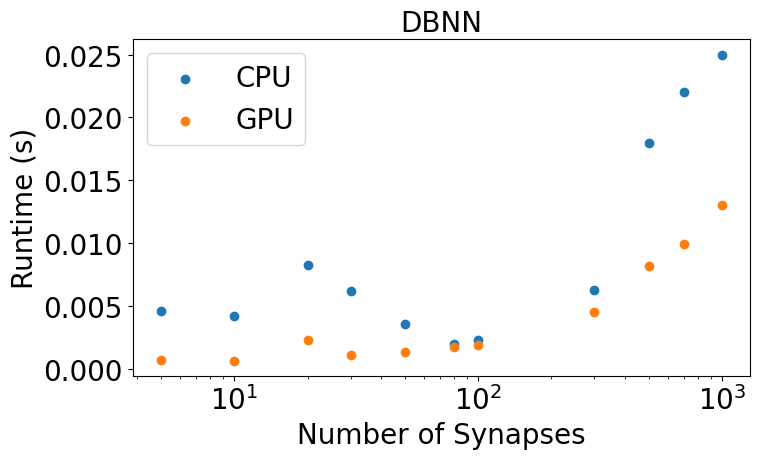

In [15]:
# -----------------------------
# 假设你已经收集好如下格式的数据：

num_synapse = np.array([5, 10, 20, 30, 50, 80, 100, 300, 500, 700, 1000]).reshape(-1, 1)
runtimes  = np.array([0.0046, 0.0042, 0.0083, 0.0062, 0.0036, 0.0020, 0.0023, 0.0063, 0.018, 0.022, 0.025])
runtimes2  = np.array([0.00072, 0.00066, 0.0023, 0.0011, 0.0013, 0.0017, 0.0019, 0.0045, 0.0082, 0.0099, 0.013])

# -----------------------------
# 绘图
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(num_synapse, runtimes, label='CPU')
plt.scatter(num_synapse, runtimes2, label='GPU')
# plt.ylim(90, 110)
# 把回归斜率写进标题
plt.title(f"DBNN", fontsize=20)
plt.xlabel("Number of Synapses")
plt.ylabel("Runtime (s)")
plt.xscale('log')
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.savefig("figure/DBNN_c_g_num_2.png", dpi=900)


In [ ]:
# -----------------------------
# 假设你已经收集好如下格式的数据：

num_synapse = np.array([100, 300, 500, 700, 1000]).reshape(-1, 1)
runtimes  = np.array([0.0034, 0.0063, 0.018, 0.022, 0.025])
runtimes2  = np.array([0.00021, 0.00045, 0.0082, 0.0099, 0.013])

# -----------------------------
# 绘图
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(num_synapse, runtimes, label='CPU')
plt.scatter(num_synapse, runtimes2, label='GPU')
# plt.ylim(90, 110)
# 把回归斜率写进标题
plt.title(f"DBNN", fontsize=20)
plt.xlabel("Number of Synapses")
plt.ylabel("Runtime (s)")
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.savefig("figure/DBNN_c_g_num.png", dpi=900)


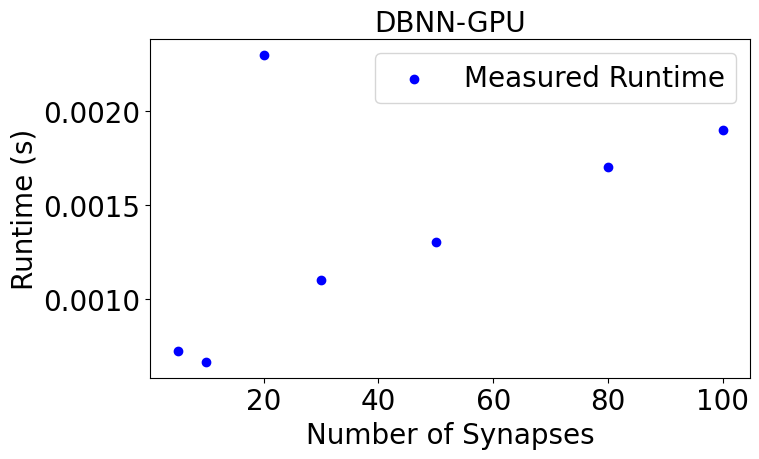

In [8]:
# -----------------------------
# 假设你已经收集好如下格式的数据：

num_synapse = np.array([5, 10, 20, 30, 50, 80, 100]).reshape(-1, 1)
runtimes  = np.array([0.00072, 0.00066, 0.0023, 0.0011, 0.0013, 0.0017, 0.0019])


# -----------------------------
# 绘图
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(num_synapse, runtimes, color='blue', label='Measured Runtime')
# plt.ylim(90, 110)
# 把回归斜率写进标题
plt.title(f"DBNN-GPU", fontsize=20)
plt.xlabel("Number of Synapses")
plt.ylabel("Runtime (s)")
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.savefig("figure/DBNN_g_num.png", dpi=900)


线性回归斜率 = -0.022308 sec/ms


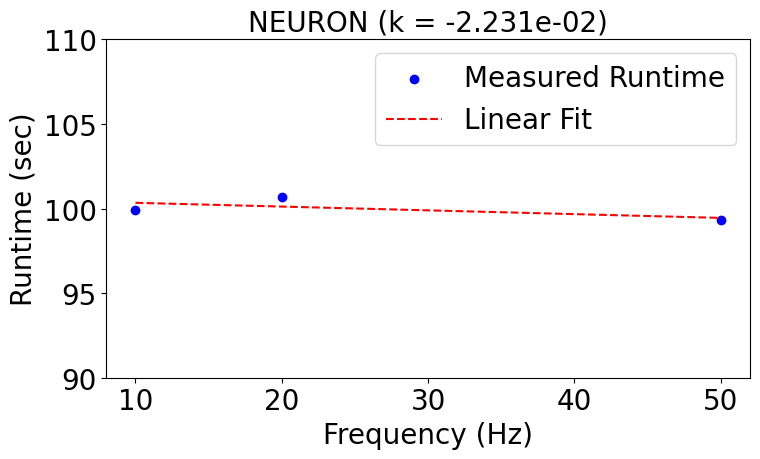

In [2]:
# -----------------------------
# 假设你已经收集好如下格式的数据：

durations = np.array([500, 1000, 2000, 3000, 5000]).reshape(-1, 1)
frequencies = np.array([10, 20, 50]).reshape(-1, 1)  
runtimes  = np.array([99.90, 100.70, 99.30])

# -----------------------------
# 进行线性回归
# -----------------------------
model = LinearRegression()
# model.fit(durations, runtimes)
model.fit(frequencies, runtimes)  

slope = model.coef_[0]
intercept = model.intercept_

# 用模型生成拟合线
# x_line = np.linspace(durations.min(), durations.max(), 100).reshape(-1, 1)
x_line = np.linspace(frequencies.min(), frequencies.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

print(f"线性回归斜率 = {slope:.6f} sec/ms")

# -----------------------------
# 画图
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(frequencies, runtimes, color='blue', label='Measured Runtime')
plt.plot(x_line, y_line, color='red', linestyle='--', label='Linear Fit')
plt.ylim(90, 110)
# 把回归斜率写进标题
plt.title(f"NEURON (k = {slope:.3e})", fontsize=20)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Runtime (sec)")
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.savefig("figure/neuron_runtime_vs_frequency.png", dpi=900)


线性回归斜率 = -0.000649 sec/ms


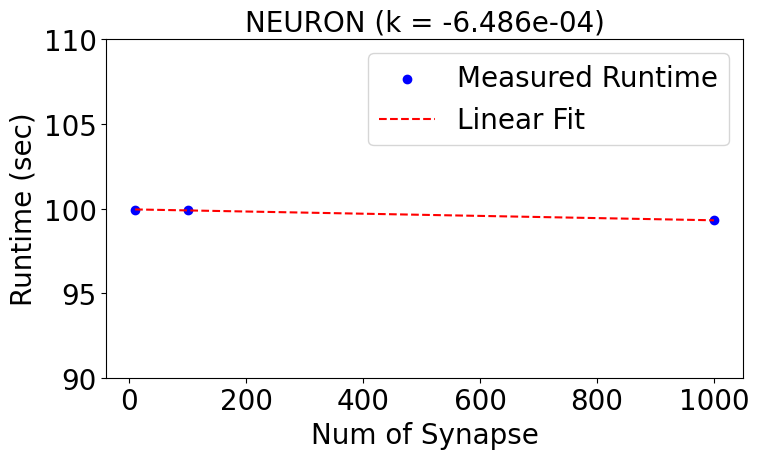

In [9]:
# -----------------------------
# 假设你已经收集好如下格式的数据：

# durations = np.array([500, 1000, 2000, 3000, 5000]).reshape(-1, 1)
num_of_synapse = np.array([10, 100, 1000]).reshape(-1, 1)  
runtimes  = np.array([99.90, 99.94, 99.30])

# -----------------------------
# 进行线性回归
# -----------------------------
model = LinearRegression()
# model.fit(durations, runtimes)
model.fit(num_of_synapse, runtimes)  

slope = model.coef_[0]
intercept = model.intercept_

# 用模型生成拟合线
# x_line = np.linspace(durations.min(), durations.max(), 100).reshape(-1, 1)
x_line = np.linspace(num_of_synapse.min(), num_of_synapse.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

print(f"线性回归斜率 = {slope:.6f} sec/ms")

# -----------------------------
# 画图
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(num_of_synapse, runtimes, color='blue', label='Measured Runtime')
plt.plot(x_line, y_line, color='red', linestyle='--', label='Linear Fit')
plt.ylim(90, 110)
# 把回归斜率写进标题
plt.title(f"NEURON (k = {slope:.3e})", fontsize=20)
plt.xlabel("Num of Synapse")
plt.ylabel("Runtime (sec)")
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.savefig("figure/neuron_runtime_vs_synapse.png", dpi=900)


线性回归斜率 = 0.098784 sec/ms


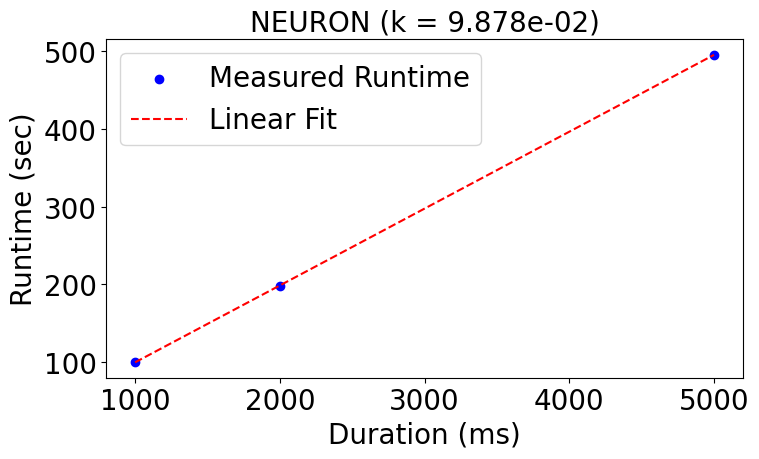

In [10]:
# -----------------------------
# 假设你已经收集好如下格式的数据：

durations = np.array([1000, 2000, 5000]).reshape(-1, 1)
# num_of_synapse = np.array([10, 100, 1000]).reshape(-1, 1)  
runtimes  = np.array([100.48, 197.98, 495.25])

# -----------------------------
# 进行线性回归
# -----------------------------
model = LinearRegression()
model.fit(durations, runtimes)
# model.fit(num_of_synapse, runtimes)  

slope = model.coef_[0]
intercept = model.intercept_

# 用模型生成拟合线
x_line = np.linspace(durations.min(), durations.max(), 100).reshape(-1, 1)
# x_line = np.linspace(num_of_synapse.min(), num_of_synapse.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

print(f"线性回归斜率 = {slope:.6f} sec/ms")

# -----------------------------
# 画图
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(durations, runtimes, color='blue', label='Measured Runtime')
plt.plot(x_line, y_line, color='red', linestyle='--', label='Linear Fit')
# plt.ylim(90, 110)
# 把回归斜率写进标题
plt.title(f"NEURON (k = {slope:.3e})", fontsize=20)
plt.xlabel("Duration (ms)")
plt.ylabel("Runtime (sec)")
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.savefig("figure/neuron_runtime_vs_duration.png", dpi=900)


线性回归斜率 = 0.000027 sec/ms


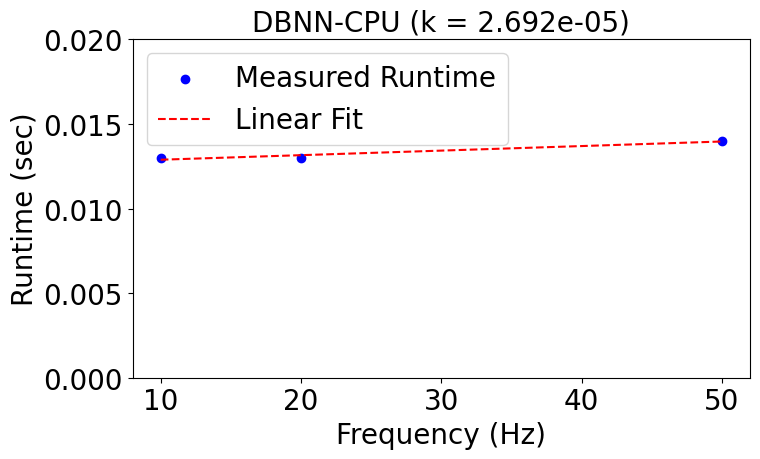

In [4]:
# -----------------------------
# 假设你已经收集好如下格式的数据：

durations = np.array([500, 1000, 2000, 3000, 5000]).reshape(-1, 1)
frequencies = np.array([10, 20, 50]).reshape(-1, 1)  
runtimes  = np.array([0.013, 0.013, 0.014])

# -----------------------------
# 进行线性回归
# -----------------------------
model = LinearRegression()
# model.fit(durations, runtimes)
model.fit(frequencies, runtimes)  

slope = model.coef_[0]
intercept = model.intercept_

# 用模型生成拟合线
# x_line = np.linspace(durations.min(), durations.max(), 100).reshape(-1, 1)
x_line = np.linspace(frequencies.min(), frequencies.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

print(f"线性回归斜率 = {slope:.6f} sec/ms")

# -----------------------------
# 画图
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(frequencies, runtimes, color='blue', label='Measured Runtime')
plt.plot(x_line, y_line, color='red', linestyle='--', label='Linear Fit')
plt.ylim(0, 0.02)
# 把回归斜率写进标题
plt.title(f"DBNN-CPU (k = {slope:.3e})", fontsize=20)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Runtime (sec)")
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.savefig("figure/DBNN_c_runtime_vs_frequency.png", dpi=900)


线性回归斜率 = 0.000060 sec/ms


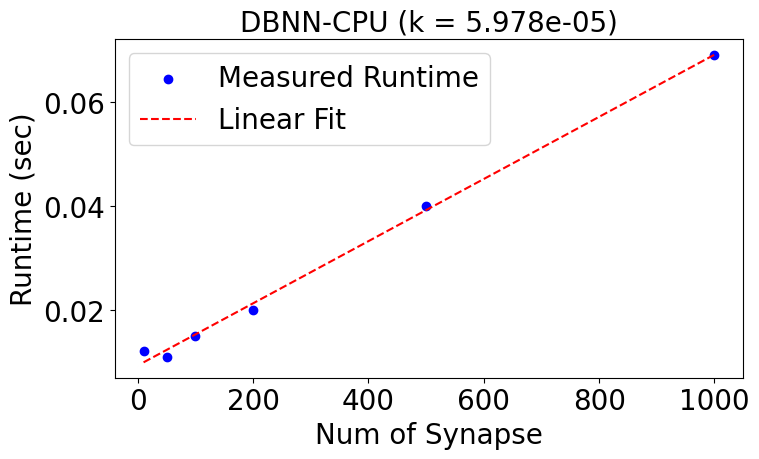

In [17]:
# -----------------------------
# 假设你已经收集好如下格式的数据：

# durations = np.array([500, 1000, 2000, 3000, 5000]).reshape(-1, 1)
num_of_synapse = np.array([10, 50, 100, 200, 500, 1000]).reshape(-1, 1)  
runtimes  = np.array([0.012, 0.011, 0.015, 0.020, 0.040, 0.069])

# -----------------------------
# 进行线性回归
# -----------------------------
model = LinearRegression()
# model.fit(durations, runtimes)
model.fit(num_of_synapse, runtimes)  

slope = model.coef_[0]
intercept = model.intercept_

# 用模型生成拟合线
# x_line = np.linspace(durations.min(), durations.max(), 100).reshape(-1, 1)
x_line = np.linspace(num_of_synapse.min(), num_of_synapse.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

print(f"线性回归斜率 = {slope:.6f} sec/ms")

# -----------------------------
# 画图
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(num_of_synapse, runtimes, color='blue', label='Measured Runtime')
plt.plot(x_line, y_line, color='red', linestyle='--', label='Linear Fit')
# plt.ylim(90, 110)
# 把回归斜率写进标题
plt.title(f"DBNN-CPU (k = {slope:.3e})", fontsize=20)
plt.xlabel("Num of Synapse")
plt.ylabel("Runtime (sec)")
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.savefig("figure/DBNN_c_runtime_vs_synapse.png", dpi=900)


二次拟合结果： runtime ≈ a*T^2 + b*T + c
a = 3.622749e-07
b = -2.022590e-03
c = 2.108221e+00


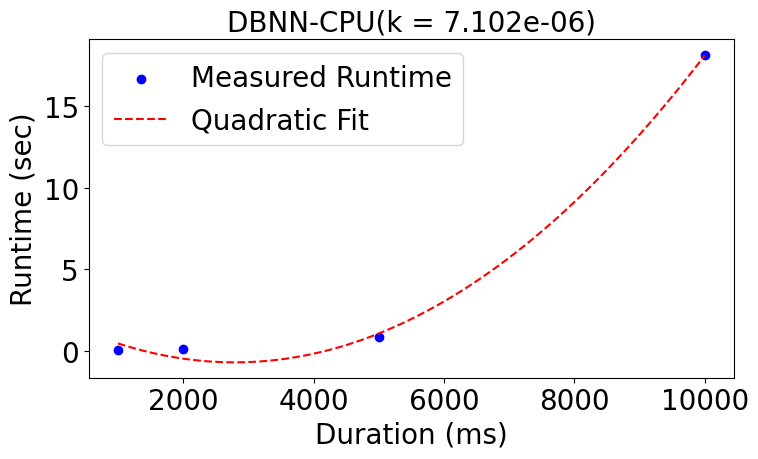

In [23]:
# -----------------------------
# 假设你已经收集好如下格式的数据：

durations = np.array([1000, 2000, 5000, 10000]).reshape(-1, 1)
runtimes  = np.array([0.046, 0.115, 0.811, 18.15])

# -----------------------------
# 进行线性回归
# ----------------------------- 
T = durations.flatten()
X = np.column_stack([T, T**2])
model = LinearRegression()
model.fit(X, runtimes)
# model.fit(num_of_synapse, runtimes)  

a = model.coef_[1]   # T² 的系数
b = model.coef_[0]   # T 的系数
c = model.intercept_

print("二次拟合结果： runtime ≈ a*T^2 + b*T + c")
print(f"a = {a:.6e}")
print(f"b = {b:.6e}")
print(f"c = {c:.6e}")

# -----------------------------
# 作拟合曲线
# -----------------------------
x_line = np.linspace(T.min(), T.max(), 200)
X_line = np.column_stack([x_line, x_line**2])
y_line = model.predict(X_line)

# -----------------------------
# 绘图
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(T, runtimes, color='blue', label='Measured Runtime')
plt.plot(x_line, y_line, color='red', linestyle='--', label='Quadratic Fit')
# plt.ylim(90, 110)
# 把回归斜率写进标题
plt.title(f"DBNN-CPU(k = {slope:.3e})", fontsize=20)
plt.xlabel("Duration (ms)")
plt.ylabel("Runtime (sec)")
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.savefig("figure/DBNN_c_runtime_vs_duration.png", dpi=900)


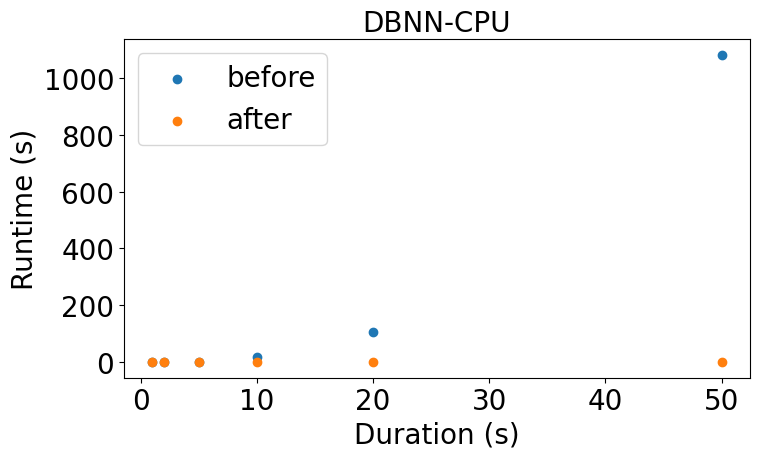

In [4]:
# -----------------------------
# 假设你已经收集好如下格式的数据：

durations = np.array([1, 2, 5, 10, 20, 50]).reshape(-1, 1)
runtimes_1  = np.array([0.061, 0.182, 0.739, 18.27, 105.5, 1080.8])
runtimes_2  = np.array([0.025, 0.037, 0.111, 0.221, 0.467, 1.113])

# 绘图
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(durations, runtimes_1, label='before')
plt.scatter(durations, runtimes_2, label='after')

# plt.ylim(90, 110)
# 把回归斜率写进标题
plt.title(f"DBNN-CPU", fontsize=20)
plt.xlabel("Duration (s)")
plt.ylabel("Runtime (s)")
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.savefig("figure/DBNN_c_optim.png", dpi=900)


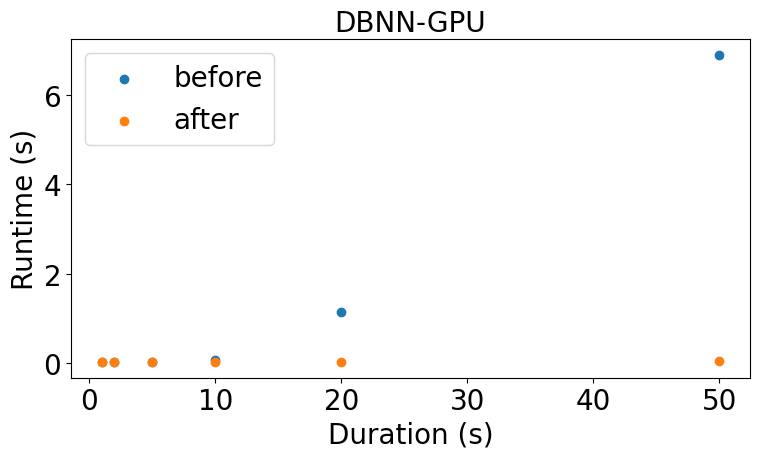

In [6]:
# -----------------------------
# 假设你已经收集好如下格式的数据：

durations = np.array([1, 2, 5, 10, 20, 50]).reshape(-1, 1)
runtimes_1  = np.array([0.014, 0.014, 0.022, 0.076, 1.13, 6.90])
runtimes_2  = np.array([0.0138, 0.0138, 0.0137, 0.0139, 0.0170, 0.0473])

# 绘图
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(durations, runtimes_1, label='before')
plt.scatter(durations, runtimes_2, label='after')

# plt.ylim(90, 110)
# 把回归斜率写进标题
plt.title(f"DBNN-GPU", fontsize=20)
plt.xlabel("Duration (s)")
plt.ylabel("Runtime (s)")
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.savefig("figure/DBNN_g_optim.png", dpi=900)


线性回归斜率 = -0.000001 sec/ms


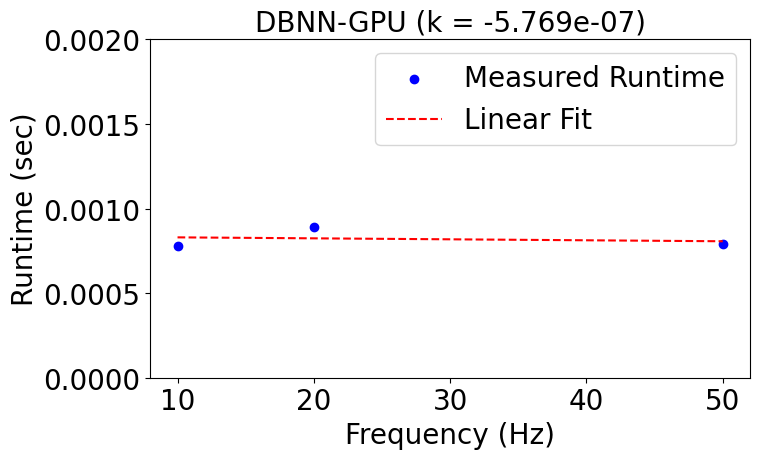

In [7]:
# -----------------------------
# 假设你已经收集好如下格式的数据：

durations = np.array([500, 1000, 2000, 3000, 5000]).reshape(-1, 1)
frequencies = np.array([10, 20, 50]).reshape(-1, 1)  
runtimes  = np.array([0.00078, 0.00089, 0.00079])

# -----------------------------
# 进行线性回归
# -----------------------------
model = LinearRegression()
# model.fit(durations, runtimes)
model.fit(frequencies, runtimes)  

slope = model.coef_[0]
intercept = model.intercept_

# 用模型生成拟合线
# x_line = np.linspace(durations.min(), durations.max(), 100).reshape(-1, 1)
x_line = np.linspace(frequencies.min(), frequencies.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

print(f"线性回归斜率 = {slope:.6f} sec/ms")

# -----------------------------
# 画图
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(frequencies, runtimes, color='blue', label='Measured Runtime')
plt.plot(x_line, y_line, color='red', linestyle='--', label='Linear Fit')
plt.ylim(0, 0.002)
# 把回归斜率写进标题
plt.title(f"DBNN-GPU (k = {slope:.3e})", fontsize=20)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Runtime (sec)")
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.savefig("figure/DBNN_g_runtime_vs_frequency.png", dpi=900)


线性回归斜率 = 0.000016 sec/ms


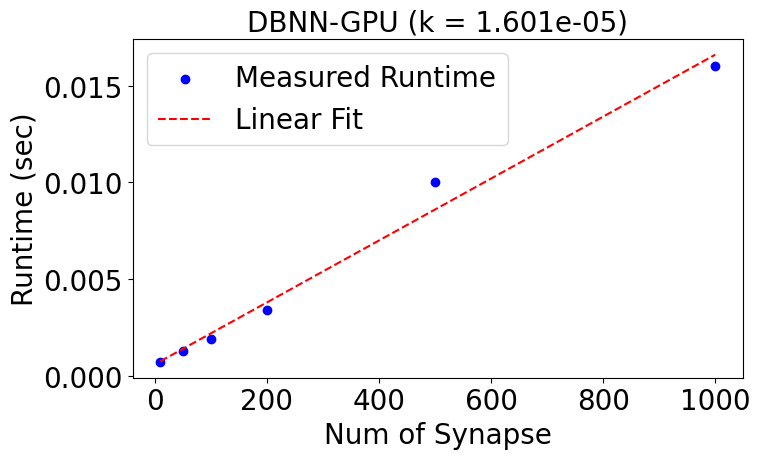

In [18]:
# -----------------------------
# 假设你已经收集好如下格式的数据：

# durations = np.array([500, 1000, 2000, 3000, 5000]).reshape(-1, 1)
num_of_synapse = np.array([10, 50, 100, 200, 500, 1000]).reshape(-1, 1)  
runtimes  = np.array([0.00069, 0.0013, 0.0019, 0.0034, 0.010, 0.016])

# -----------------------------
# 进行线性回归
# -----------------------------
model = LinearRegression()
# model.fit(durations, runtimes)
model.fit(num_of_synapse, runtimes)  

slope = model.coef_[0]
intercept = model.intercept_

# 用模型生成拟合线
# x_line = np.linspace(durations.min(), durations.max(), 100).reshape(-1, 1)
x_line = np.linspace(num_of_synapse.min(), num_of_synapse.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

print(f"线性回归斜率 = {slope:.6f} sec/ms")

# -----------------------------
# 画图
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(num_of_synapse, runtimes, color='blue', label='Measured Runtime')
plt.plot(x_line, y_line, color='red', linestyle='--', label='Linear Fit')
# plt.ylim(90, 110)
# 把回归斜率写进标题
plt.title(f"DBNN-GPU (k = {slope:.3e})", fontsize=20)
plt.xlabel("Num of Synapse")
plt.ylabel("Runtime (sec)")
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.savefig("figure/DBNN_g_runtime_vs_synapse.png", dpi=900)


二次拟合结果： runtime ≈ a*T^2 + b*T + c
a = 9.963168e-10
b = -4.060773e-06
c = 1.689319e-02


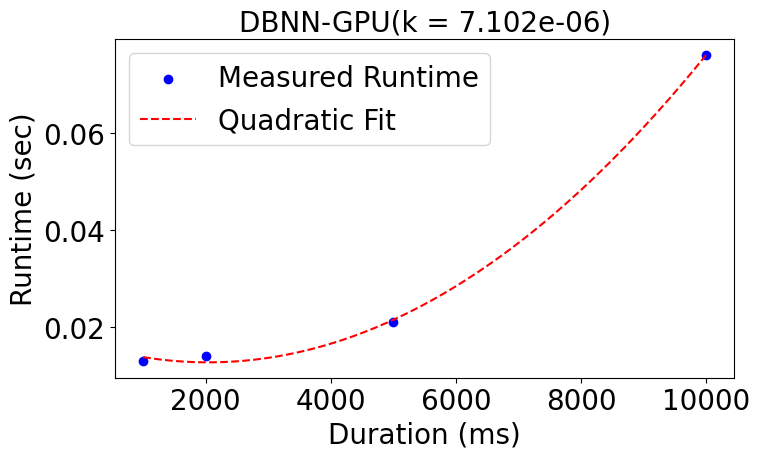

In [22]:
# -----------------------------
# 假设你已经收集好如下格式的数据：

durations = np.array([1000, 2000, 5000, 10000]).reshape(-1, 1)
runtimes  = np.array([0.013, 0.014, 0.021, 0.076])

# -----------------------------
# 进行线性回归
# -----------------------------
T = durations.flatten()
X = np.column_stack([T, T**2])
model = LinearRegression()
model.fit(X, runtimes)
# model.fit(num_of_synapse, runtimes)  

a = model.coef_[1]   # T² 的系数
b = model.coef_[0]   # T 的系数
c = model.intercept_

print("二次拟合结果： runtime ≈ a*T^2 + b*T + c")
print(f"a = {a:.6e}")
print(f"b = {b:.6e}")
print(f"c = {c:.6e}")

# -----------------------------
# 作拟合曲线
# -----------------------------
x_line = np.linspace(T.min(), T.max(), 200)
X_line = np.column_stack([x_line, x_line**2])
y_line = model.predict(X_line)

# -----------------------------
# 绘图
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(T, runtimes, color='blue', label='Measured Runtime')
plt.plot(x_line, y_line, color='red', linestyle='--', label='Quadratic Fit')
# plt.ylim(90, 110)
# 把回归斜率写进标题
plt.title(f"DBNN-GPU(k = {slope:.3e})", fontsize=20)
plt.xlabel("Duration (ms)")
plt.ylabel("Runtime (sec)")
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.savefig("figure/DBNN_g_runtime_vs_duration.png", dpi=900)


In [ ]:
import os
import sys
import json
import time
import numpy as np
from tqdm import tqdm
from neuron import h
from Purkinje_py3 import Purkinje_py3

# ================================
# NEURON 设置
# ================================
h.load_file("stdrun.hoc")
cv = h.CVode()
cv.active(0)  # 禁用变步长积分

h.dt = 0.1  # 步长

# ================================
# 创建 Purkinje 神经元
# ================================
cell = Purkinje_py3()

# 收集所有 section 以便随机放置突触
sec_list = [sec for sec in h.allsec()]


# ============================================================
# 创建随机突触 + Poisson 刺激
# ============================================================
def create_random_synapses(N_syn, freq_hz):
    syns = []
    netstims = []
    netcons = []

    for i in range(N_syn):
        sec = np.random.choice(sec_list)
        loc = np.random.rand()

        syn = h.ExpSyn(sec(loc))
        syn.tau = 2.0
        syns.append(syn)

        ns = h.NetStim()
        ns.interval = 1000.0 / freq_hz
        ns.start = 0
        ns.number = 1e9
        ns.noise = 1

        netstims.append(ns)

        nc = h.NetCon(ns, syn)
        nc.weight[0] = 0.005
        netcons.append(nc)

    return syns, netstims, netcons


# ============================================================
# 单一参数组合下运行 n 次并计时
# ============================================================
def run_simulation(duration, N_syn, freq_hz, n_repeat=3):
    run_times = []

    for run_id in tqdm(range(n_repeat), desc=f"  Repeats (N={N_syn}, freq={freq_hz}, dur={duration})", leave=False):
        h.Random().Random123(run_id + 1, run_id * 7 + 11)

        syns, ns, nc = create_random_synapses(N_syn, freq_hz)

        t0 = time.time()
        h.finitialize(-65)
        h.continuerun(duration)
        t1 = time.time()

        elapsed = t1 - t0
        run_times.append(elapsed)

    avg_time = float(np.mean(run_times))
    return avg_time, run_times


# ============================================================
# 主流程：对所有参数循环（带 tqdm）
# ============================================================
def sweep_parameters(duration_list, synapse_list, freq_list, outfile="runtime_results.json"):
    results = {}

    total_tasks = len(duration_list) * len(synapse_list) * len(freq_list)

    pbar = tqdm(total=total_tasks, desc="Total Parameter Sweep")

    for duration in duration_list:
        for N_syn in synapse_list:
            for freq in freq_list:

                key = f"duration_{duration}_syn_{N_syn}_freq_{freq}"

                avg, each = run_simulation(duration, N_syn, freq)

                results[key] = {
                    "duration_ms": duration,
                    "synapses": N_syn,
                    "freq_hz": freq,
                    "avg_runtime_sec": avg,
                    "runs": each,
                }

                pbar.update(1)

    pbar.close()

    with open(outfile, "w") as f:
        json.dump(results, f, indent=4)

    print(f"\n参数扫描结束，结果已保存：{outfile}")
    return results


# ============================================================
# 设置参数并运行
# ============================================================
duration_list = [2000, 5000, 10000]   # ms
synapse_list = [10, 100, 1000]
freq_list = [10, 20, 50]              # Hz

sweep_parameters(duration_list, synapse_list, freq_list, outfile="runtime_results.json")


  Repeats (N=10, freq=10, dur=2000):   0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
# 随机突触位置数量
N_syn = 10
T_sim = 5000.0   # ms 
dt = 0.1        # NEURON 默认步长 (你也可改成自己想要的)
h.dt = dt

In [3]:
sec_list = []
for sec in h.allsec():      # Purkinje_py3 内是否叫 all_sections？如需改成 cell.dend 或 cell.all_sec
    sec_list.append(sec)

print("Dendritic sections:", len(sec_list))

Dendritic sections: 1611


In [ ]:
def create_random_synapses(cell, N):

    syns = []
    netstims = []
    netcons = []

    for i in range(N):
        # 随机选择一个 dendrite
        sec = np.random.choice(sec_list)

        # 在 0~1 的位置随机放置
        loc = np.random.rand()

        # 创建突触
        syn = h.ExpSyn(sec(loc))
        syn.tau = 2.0   # 可自行修改 
        syns.append(syn)

        # Poisson NetStim
        ns = h.NetStim()
        ns.interval = 1000.0 / 20.0   # 20 Hz Poisson 平均频率
        ns.start = 0
        ns.number = 1000       # 无限近似
        ns.noise = 1          # 关键：noise=1 使其随机

        netstims.append(ns)

        # NetCon
        nc = h.NetCon(ns, syn)
        nc.weight[0] = 0.005
        netcons.append(nc)

    return syns, netstims, netcons

In [5]:
def run_simulation(n_runs=5):
    times = []

    for run in range(n_runs):

        # 每轮重新生成突触 + Poisson 刺激
        syns, netstims, netcons = create_random_synapses(cell, N_syn)

        # 强制随机 seed
        h.Random().Random123(run+1, run*3+7)

        # 计时
        t0 = time.time()

        h.finitialize(-65)
        h.continuerun(T_sim)

        t1 = time.time()
        elapsed = t1 - t0
        times.append(elapsed)

        print(f"Run {run+1}: {elapsed:.3f} seconds")

    print("\nAverage runtime:", np.mean(times), "s")
    return times


# ----------------------
# 运行测试
# ----------------------
run_times = run_simulation(n_runs=5)

Run 1: 452.821 seconds
Run 2: 453.660 seconds
Run 3: 457.723 seconds
Run 4: 455.238 seconds
Run 5: 492.559 seconds

Average runtime: 462.4001583576202 s
